In [1]:
%matplotlib inline
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read CSV files, and then merge the two
#Changed the 'Geometry' coulmn names below so that the gmap could read the coordinates of the wards
crime2017_csv_path = "Resources/Crimes_MASTER_2017.csv"
crime2018_csv_path = "Resources/Crimes_MASTER_2018.csv"

crime_2018_df = pd.read_csv(crime2018_csv_path)
crime_2018_df = crime_2018_df.rename(columns={"Geometry" : "geometry"})
crime_2017_df = pd.read_csv(crime2017_csv_path)
crime_2017_df = crime_2017_df.rename(columns={"Geometry" : "geometry"})

crime_master = pd.concat((crime_2017_df,crime_2018_df),axis=0,join='outer',join_axes=None,ignore_index=False)

#drop any NA values
crime_master = crime_master.dropna(how='any')

#check to see if all columns match up 
crime_master.count()

ID                      104723
Date                    104723
IUCR                    104723
Primary Type            104723
Description             104723
Location Description    104723
District                104723
Ward                    104723
Community Area          104723
FBI Code                104723
X Coordinate            104723
Y Coordinate            104723
Year                    104723
Latitude                104723
Longitude               104723
geometry                104723
dtype: int64

Text(0.5, 1.0, '2017-2018 Chicago Crime')

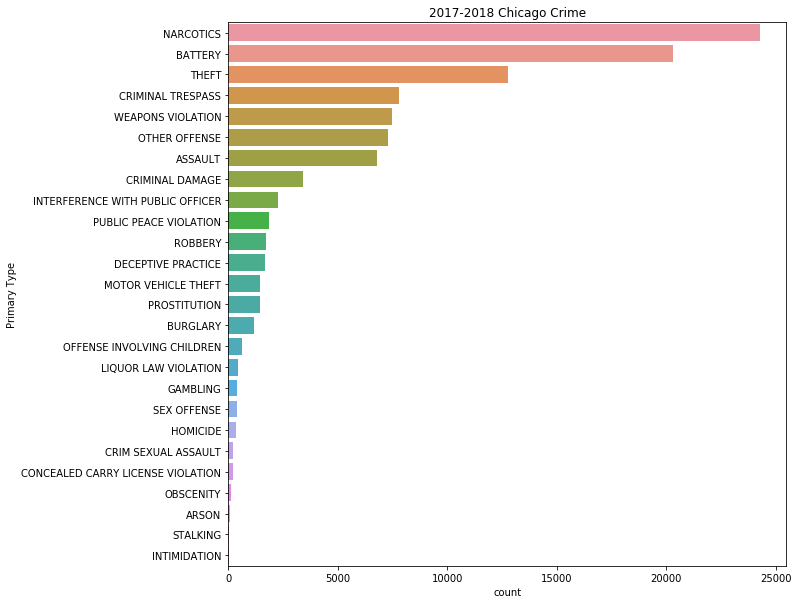

In [2]:
crime_types = crime_master['Primary Type'].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=crime_master, 
              order = crime_master['Primary Type'].value_counts().iloc[:26].index).set_title("2017-2018 Chicago Crime")

Text(0.5, 1.0, 'Crime Locations of Chicago (2017-2018)')

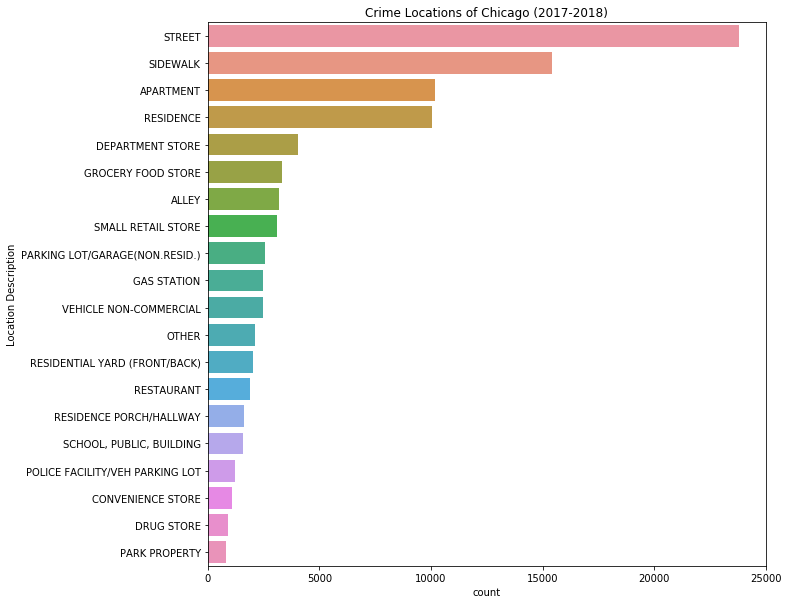

In [3]:
crime_types = crime_master['Location Description'].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y='Location Description', data=crime_master, 
              order = crime_master['Location Description'].value_counts().iloc[:20].index).set_title("Crime Locations of Chicago (2017-2018)")

Text(0.5, 1.0, 'Crime Totals of Chicago Wards (2017-2018)')

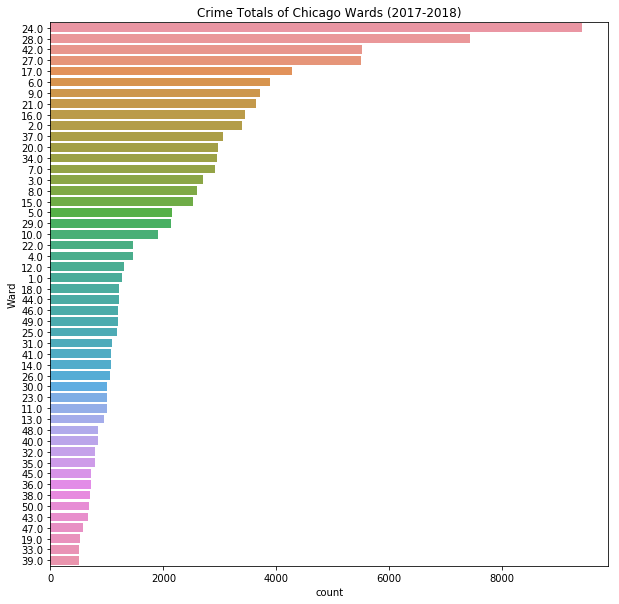

In [4]:
plt.figure(figsize=(10,10))

# Plot the world average as a line chart
sns.countplot(y='Ward', data=crime_master, 
              order = crime_master['Ward'].value_counts().iloc[:50].index).set_title("Crime Totals of Chicago Wards (2017-2018)")

<Figure size 1440x1440 with 0 Axes>

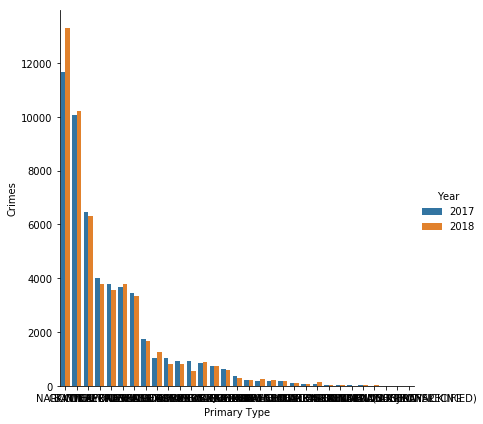

In [5]:
crime_types_2017 = crime_2017_df['Primary Type'].value_counts().reset_index()
crime_types_2018 = crime_2018_df['Primary Type'].value_counts().reset_index()

crime_types_merge = pd.merge(crime_types_2017, crime_types_2018, on = "index").rename(columns={"Primary Type_x":"2017", "Primary Type_y":"2018"})

crime_types_merge = pd.melt(crime_types_merge, id_vars="index", value_name="Crimes")
crime_types_merge = pd.DataFrame(crime_types_merge).rename(columns={"index":"Primary Type", "variable":"Year"})

plt.figure(figsize=(20,20))
#fig, ax = plt.subplotsfigsize=(20 ,20)
crime_comparison = sns.catplot(x='Primary Type', y='Crimes', hue='Year', data=crime_types_merge, kind='bar', height=6)
crime_comparison.savefig("2017_vs_2018 Crime.png")

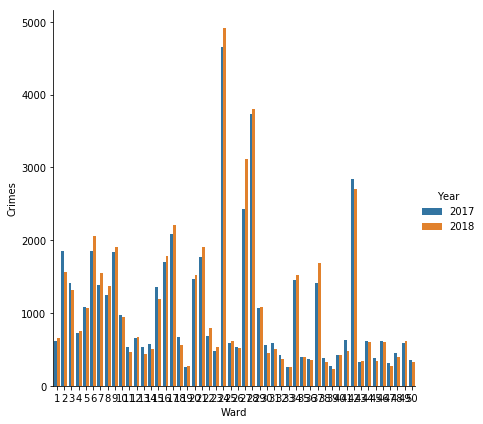

In [6]:
wards_2017 = crime_2017_df['Ward'].value_counts().reset_index()
wards_2018 = crime_2018_df['Ward'].value_counts().reset_index()

ward_types_merge = pd.merge(wards_2017, wards_2018, on = "index").rename(columns={"Ward_x":"2017", "Ward_y":"2018"})
ward_types_merge = pd.melt(ward_types_merge, id_vars="index", value_name="Crimes")
ward_types_merge = pd.DataFrame(ward_types_merge).rename(columns={"index":"Ward", "variable":"Year"})

#plt.figure(figsize=(20,20))
fig, ax = plt.subplotsfigsize=(20 ,20)
ward_comparison = sns.catplot(x='Ward', y='Crimes', hue='Year', data=ward_types_merge, kind='bar', height=6)
ward_comparison.savefig("2017_vs_2018_wardcrime.png")

In [7]:
ward_count = pd.DataFrame(crime_master["Ward"].value_counts().reset_index()).rename(columns={"index":"Ward", "Ward":"Crimes"})
ward_count.head()

,Ward,Crimes
0,24.0,9411
1,28.0,7431
2,42.0,5526
3,27.0,5501
4,17.0,4274


Text(0.5, 1.0, 'Crime Totals of Ward 24 (2017-2018)')

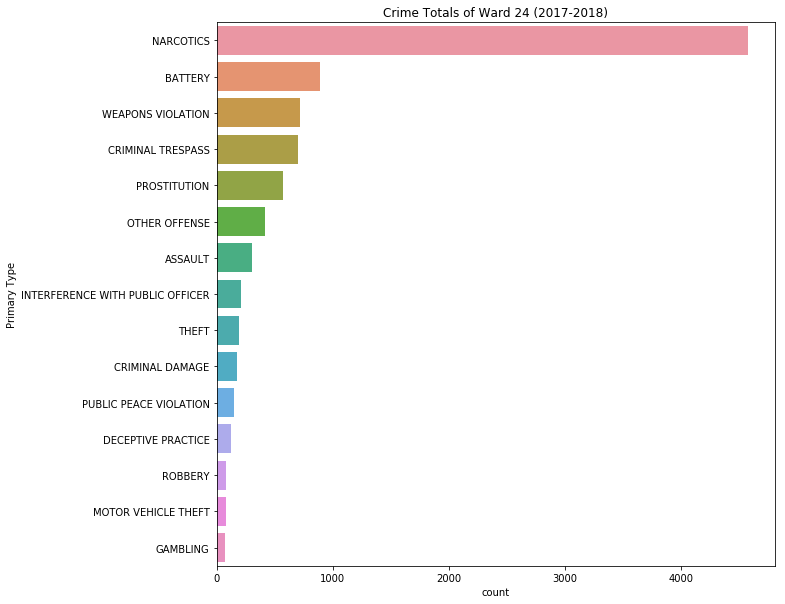

In [8]:
#do a loc on the top 5 wards, have the wards on the map (seperate maps) and show the crime breakdowns per ward
columns = [
    "Ward",
    "Primary Type",
    "Description",
    "Location Description",
    "FBI Code",
    "Latitude",
    "Longitude",
]

ward_24 = crime_master.loc[crime_master["Ward"]==24, columns]

plt.figure(figsize=(10,10))

sns.countplot(y='Primary Type', data=ward_24, 
              order = ward_24['Primary Type'].value_counts().iloc[:15].index).set_title("Crime Totals of Ward 24 (2017-2018)")


Text(0.5, 1.0, 'Narcotics of Ward 24 (2017-2018)')

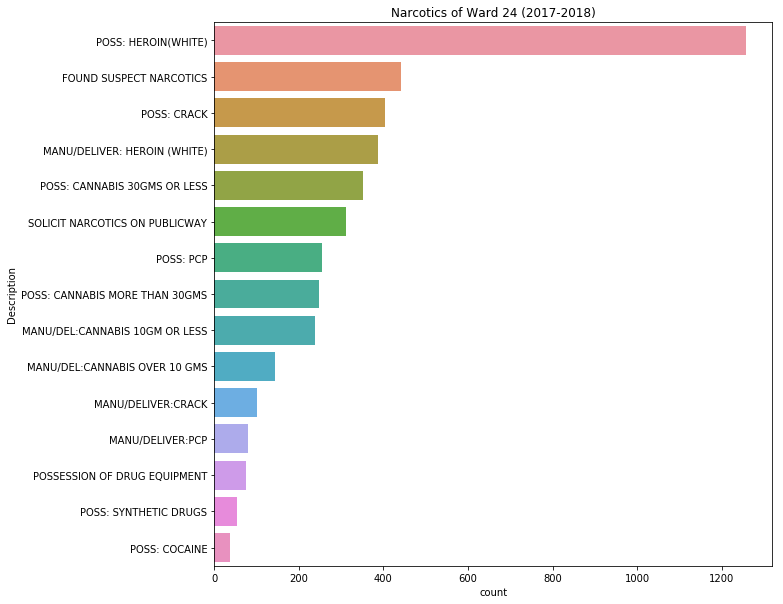

In [9]:
columns = [
    "Primary Type",
    "Description",
]

ward_24_narcotics = ward_24.loc[ward_24["Primary Type"]=="NARCOTICS", columns]
plt.figure(figsize=(10,10))

# Plot the world average as a line chart
sns.countplot(y='Description', data=ward_24_narcotics, 
              order = ward_24_narcotics['Description'].value_counts().iloc[:15].index).set_title("Narcotics of Ward 24 (2017-2018)")

Text(0.5, 1.0, 'Crime Totals of Ward 28 (2017-2018)')

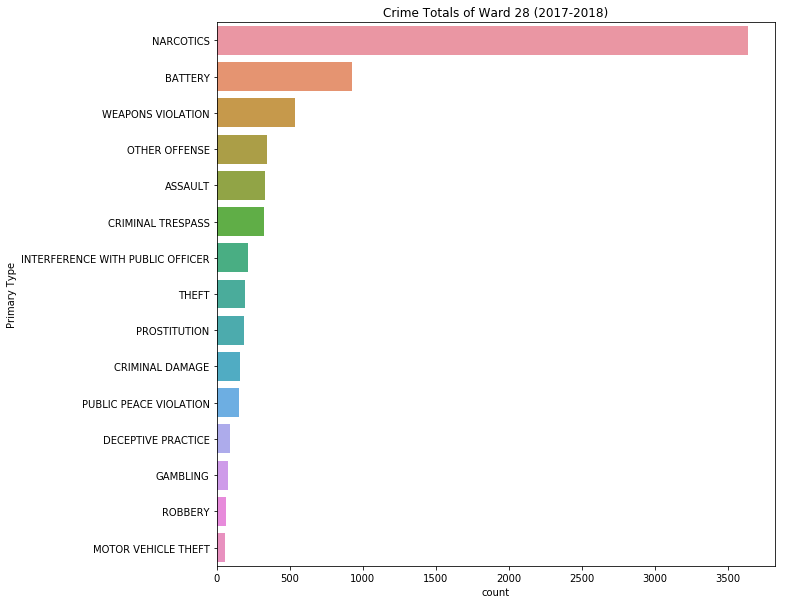

In [10]:
columns = [
    "Ward",
    "Primary Type",
    "Description",
    "Location Description",
    "FBI Code",
    "Latitude",
    "Longitude",
]

ward_28 = crime_master.loc[crime_master["Ward"]==28, columns]

plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=ward_28, 
              order = ward_28['Primary Type'].value_counts().iloc[:15].index).set_title("Crime Totals of Ward 28 (2017-2018)")

Text(0.5, 1.0, 'Narcotics of Ward 28 (2017-2018)')

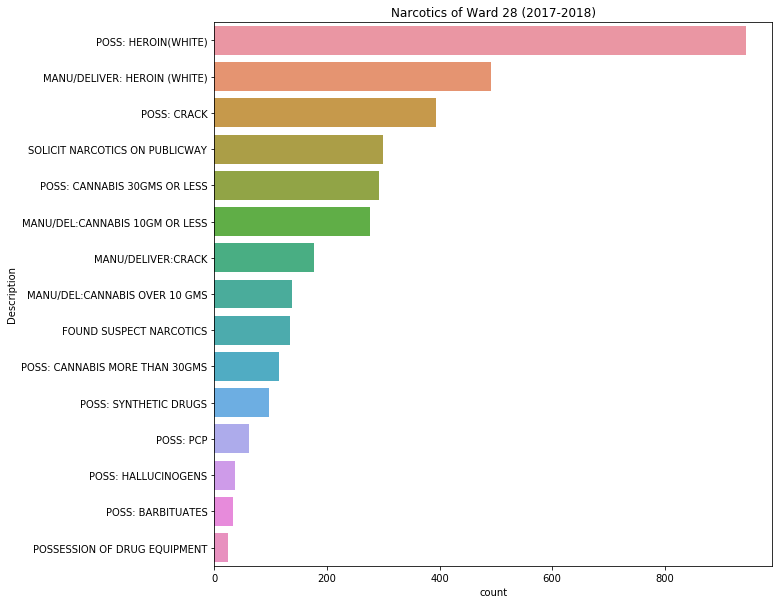

In [11]:
columns = [
    "Primary Type",
    "Description",
]

ward_28_narcotics = ward_28.loc[ward_28["Primary Type"]=="NARCOTICS", columns]
plt.figure(figsize=(10,10))

# Plot the world average as a line chart
sns.countplot(y='Description', data=ward_28_narcotics, 
              order = ward_28_narcotics['Description'].value_counts().iloc[:15].index).set_title("Narcotics of Ward 28 (2017-2018)")

Text(0.5, 1.0, 'Crime Totals of Ward 42 (2017-2018)')

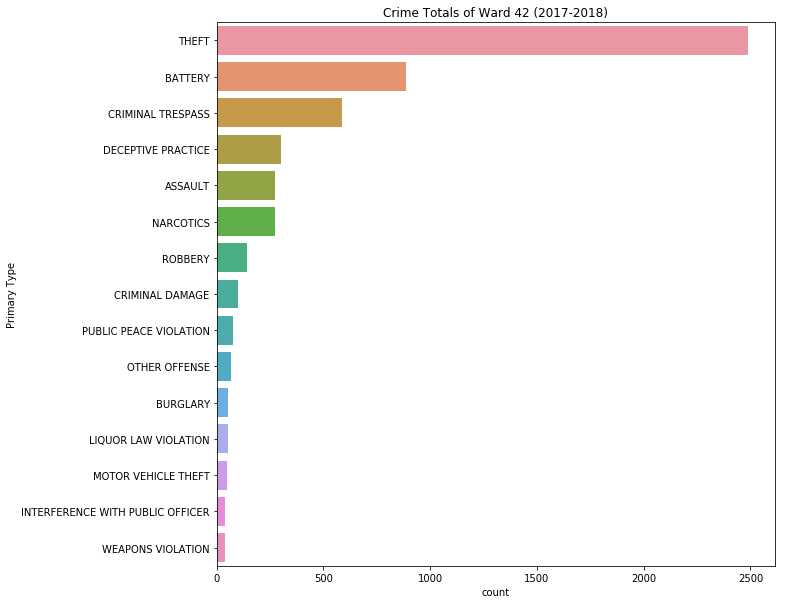

In [12]:
columns = [
    "Ward",
    "Primary Type",
    "Description",
    "Location Description",
    "FBI Code",
    "Latitude",
    "Longitude",
   
]

ward_42 = crime_master.loc[crime_master["Ward"]==42, columns]
plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=ward_42, 
              order = ward_42['Primary Type'].value_counts().iloc[:15].index).set_title("Crime Totals of Ward 42 (2017-2018)")

Text(0.5, 1.0, 'Theft of Ward 42 (2017-2018)')

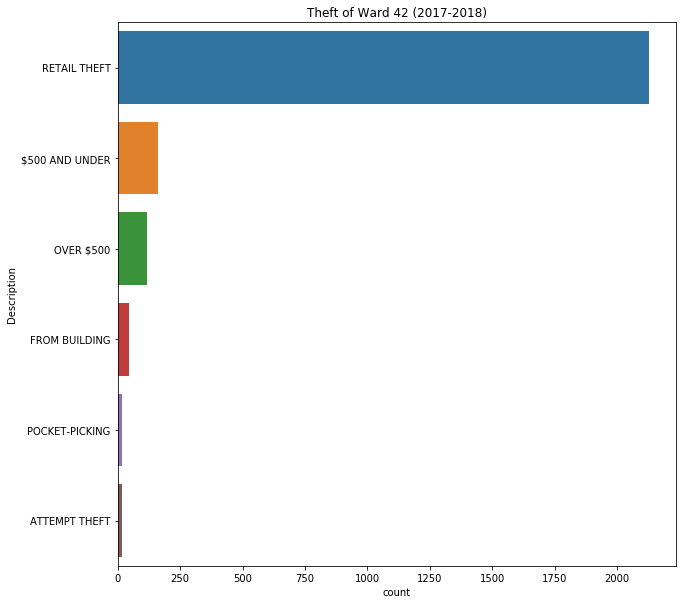

In [21]:
columns = [
    "Primary Type",
    "Description",
]

ward_42_theft = ward_42.loc[ward_42["Primary Type"]=="THEFT", columns]
plt.figure(figsize=(10,10))

# Plot the world average as a line chart
sns.countplot(y='Description', data=ward_42_narcotics, 
              order = ward_42_theft['Description'].value_counts().iloc[:6].index).set_title("Theft of Ward 42 (2017-2018)")

Text(0.5, 1.0, 'Homicide Totals of Chicago Wards (2017-2018)')

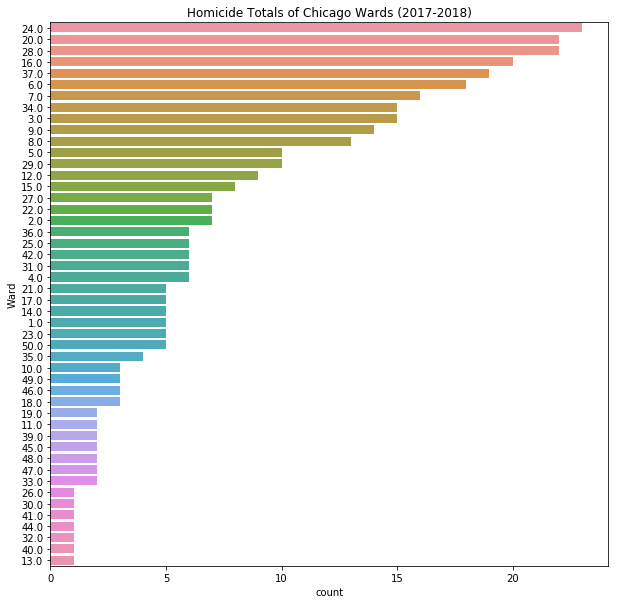

In [28]:
columns = [
    "Primary Type",
    "Ward",
    "Description",
    "Location Description",
    "FBI Code",
    "Latitude",
    "Longitude",
    "Year"
]

homicide_info = crime_master.loc[crime_master["Primary Type"]=="HOMICIDE", columns]

plt.figure(figsize=(10,10))
sns.countplot(y='Ward', data=homicide_info, 
             order = homicide_info['Ward'].value_counts().iloc[:50].index).set_title("Homicide Totals of Chicago Wards (2017-2018)")

In [29]:
homicide_wards = pd.DataFrame(homicide_info["Ward"].value_counts().reset_index()).rename(columns={"index":"Ward", "Ward":"Homicides"})
homicide_wards.head()

,Ward,Homicides
0,24.0,23
1,20.0,22
2,28.0,22
3,16.0,20
4,37.0,19


In [26]:
homicide_info = pd.DataFrame(homicide_info["Location Description"].value_counts().reset_index()).rename(columns={"index":"Location", "Location Description":"Crimes"})


,Location,Crimes
0,STREET,138
1,APARTMENT,66
2,HOUSE,32
3,AUTO,21
4,ALLEY,19


Text(0.5, 1.0, 'Locations od Homicides of Chicago (2017-2018)')

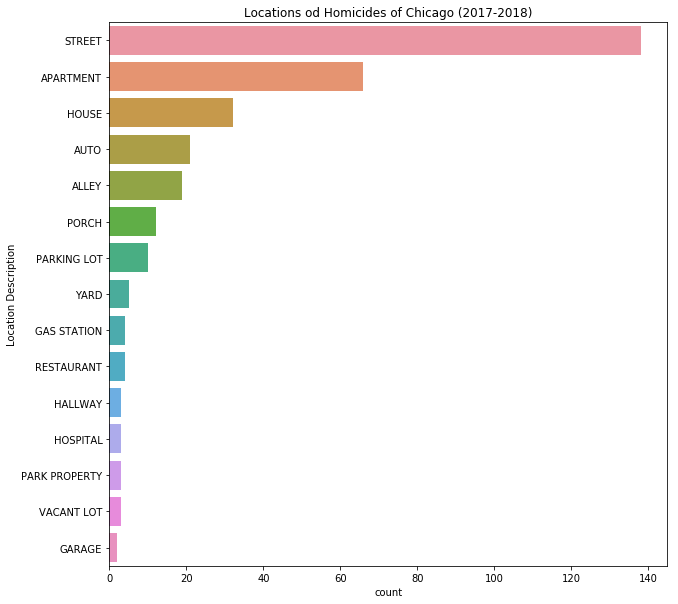

In [32]:
plt.figure(figsize=(10,10))

sns.countplot(y='Location Description', data=homicide_info, 
              order = homicide_info['Location Description'].value_counts().iloc[:15].index).set_title("Locations od Homicides of Chicago (2017-2018)")